In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
matplotlib.rcParams["figure.figsize"]=(20,10)
df1= pd.read_csv("C:/Users/19bcs/Downloads/kc_house_data.csv/.ipynb_checkpoints/kc_house_data-checkpoint.csv")
df1.head()

id             date        price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00000         3    1.00000         1180   
1  6414100192  20141209T000000 538000.00000         3    2.25000         2570   
2  5631500400  20150225T000000 180000.00000         2    1.00000          770   
3  2487200875  20141209T000000 604000.00000         4    3.00000         1960   
4  1954400510  20150218T000000 510000.00000         3    2.00000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650 1.00000           0     0  ...      7        1180              0   
1      7242 2.00000           0     0  ...      7        2170            400   
2     10000 1.00000           0     0  ...      6         770              0   
3      5000 1.00000           0     0  ...      7        1050            910   
4      8080 1.00000           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat       long  sqft_living15  \
0      1955             0    98178 47.51120 -122.25700           1340   
1      1951          1991    98125 47.72100 -122.31900           1690   
2      1933             0    98028 47.73790 -122.23300           2720   
3      1965             0    98136 47.52080 -122.39300           1360   
4      1987             0    98074 47.61680 -122.04500           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [38]:
df1.shape

(21613, 21)

In [39]:
df1.groupby('id')['id'].agg('count')

id
1000102       2
1200019       1
1200021       1
2800031       1
3600057       1
             ..
9842300095    1
9842300485    1
9842300540    1
9895000040    1
9900000190    1
Name: id, Length: 21436, dtype: int64

In [40]:
df1.shape

(21613, 21)

In [41]:
df1.isnull().sum

<bound method DataFrame.sum of           id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0    

In [42]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [44]:
int_feature =df1.select_dtypes(include=["int64"]).columns
int_feature.shape[0]

15

In [45]:
int_feature.tolist()

['id',
 'bedrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15']

In [46]:
float_feature =df1.select_dtypes(include=["float64"]).columns
float_feature.shape[0]
float_feature.tolist()

['price', 'bathrooms', 'floors', 'lat', 'long']

In [47]:
cat_feature =df1.select_dtypes(include=["object"]).columns
cat_feature.shape[0]
cat_feature.tolist()

['date']

In [48]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)
df1.describe()

id         price    bedrooms   bathrooms  sqft_living  \
count      21613.00000   21613.00000 21613.00000 21613.00000  21613.00000   
mean  4580301520.86499  540088.14177     3.37084     2.11476   2079.89974   
std   2876565571.31206  367127.19648     0.93006     0.77016    918.44090   
min      1000102.00000   75000.00000     0.00000     0.00000    290.00000   
25%   2123049194.00000  321950.00000     3.00000     1.75000   1427.00000   
50%   3904930410.00000  450000.00000     3.00000     2.25000   1910.00000   
75%   7308900445.00000  645000.00000     4.00000     2.50000   2550.00000   
max   9900000190.00000 7700000.00000    33.00000     8.00000  13540.00000   

           sqft_lot      floors  waterfront        view   condition  \
count   21613.00000 21613.00000 21613.00000 21613.00000 21613.00000   
mean    15106.96757     1.49431     0.00754     0.23430     3.40943   
std     41420.51152     0.53999     0.08652     0.76632     0.65074   
min       520.00000     1.00000     0.00000     0.00000     1.00000   
25%      5040.00000     1.00000     0.00000     0.00000     3.00000   
50%      7618.00000     1.50000     0.00000     0.00000     3.00000   
75%     10688.00000     2.00000     0.00000     0.00000     4.00000   
max   1651359.00000     3.50000     1.00000     4.00000     5.00000   

            grade  sqft_above  sqft_basement    yr_built  yr_renovated  \
count 21613.00000 21613.00000    21613.00000 21613.00000   21613.00000   
mean      7.65687  1788.39069      291.50905  1971.00514      84.40226   
std       1.17546   828.09098      442.57504    29.37341     401.67924   
min       1.00000   290.00000        0.00000  1900.00000       0.00000   
25%       7.00000  1190.00000        0.00000  1951.00000       0.00000   
50%       7.00000  1560.00000        0.00000  1975.00000       0.00000   
75%       8.00000  2210.00000      560.00000  1997.00000       0.00000   
max      13.00000  9410.00000     4820.00000  2015.00000    2015.00000   

          zipcode         lat        long  sqft_living15   sqft_lot15  
count 21613.00000 21613.00000 21613.00000    21613.00000  21613.00000  
mean  98077.93980    47.56005  -122.21390     1986.55249  12768.45565  
std      53.50503     0.13856     0.14083      685.39130  27304.17963  
min   98001.00000    47.15590  -122.51900      399.00000    651.00000  
25%   98033.00000    47.47100  -122.32800     1490.00000   5100.00000  
50%   98065.00000    47.57180  -122.23000     1840.00000   7620.00000  
75%   98118.00000    47.67800  -122.12500     2360.00000  10083.00000  
max   98199.00000    47.77760  -121.31500     6210.00000 871200.00000

In [49]:
df1.describe().shape

(8, 20)

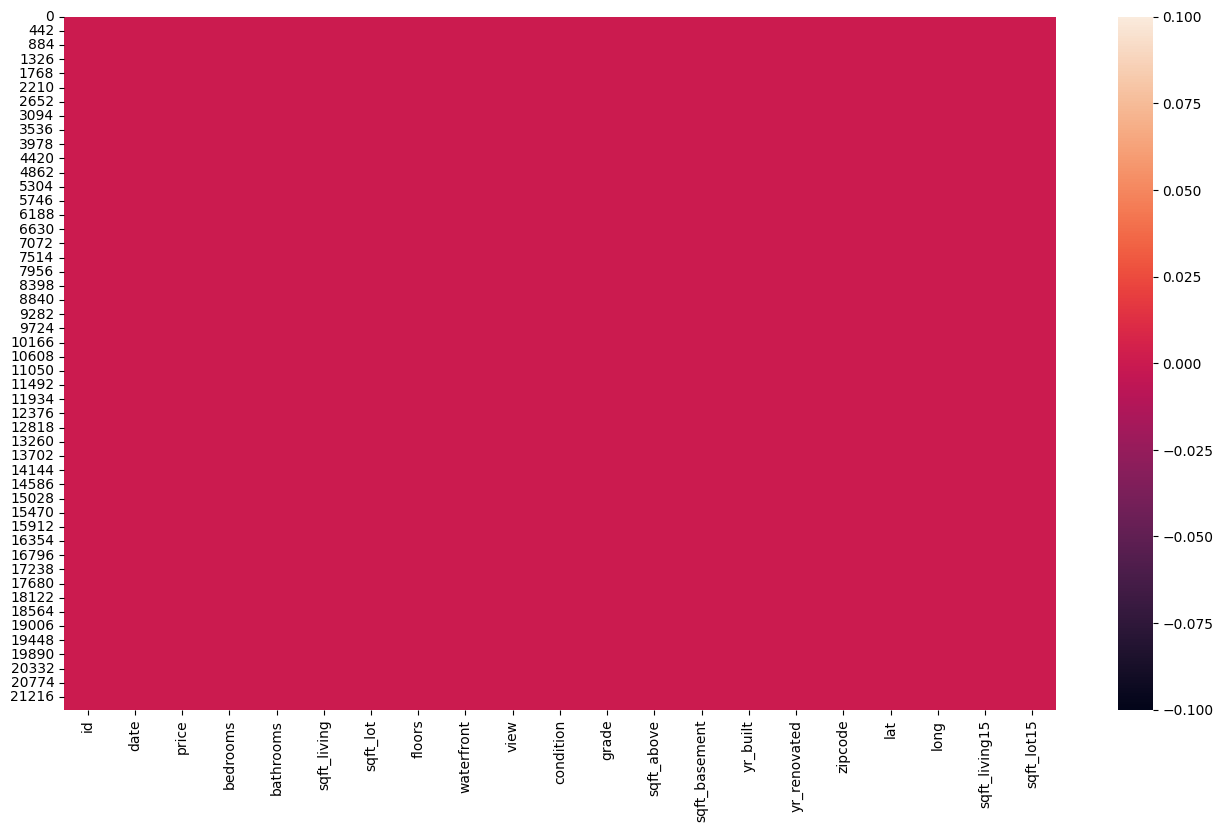

In [50]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())
plt.savefig("C:/Users/19bcs/Downloads/kc_house_data.csv/.ipynb_checkpoints/heatmap_of_null.png")

In [51]:
df1['yr_renovated']=np.where(df1['yr_renovated']==0,df1['yr_built'],df1['yr_renovated'])

In [52]:
# plt.figure(figsize=(16,9))
# sns.scatterplot(x="lat", y="long",  data=train_data, hue="price", palette="coolwarm")

In [53]:
columns_to_remove = ['id','date','lat','long']
df2 = df1.drop(columns=columns_to_remove, axis=1)
df2.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 221900.00000         3    1.00000         1180      5650 1.00000   
1 538000.00000         3    2.25000         2570      7242 2.00000   
2 180000.00000         2    1.00000          770     10000 1.00000   
3 604000.00000         4    3.00000         1960      5000 1.00000   
4 510000.00000         3    2.00000         1680      8080 1.00000   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode  sqft_living15  sqft_lot15  
0          1955    98178           1340        5650  
1          1991    98125           1690        7639  
2          1933    98028           2720        8062  
3          1965    98136           1360        5000  
4          1987    98074           1800        7503

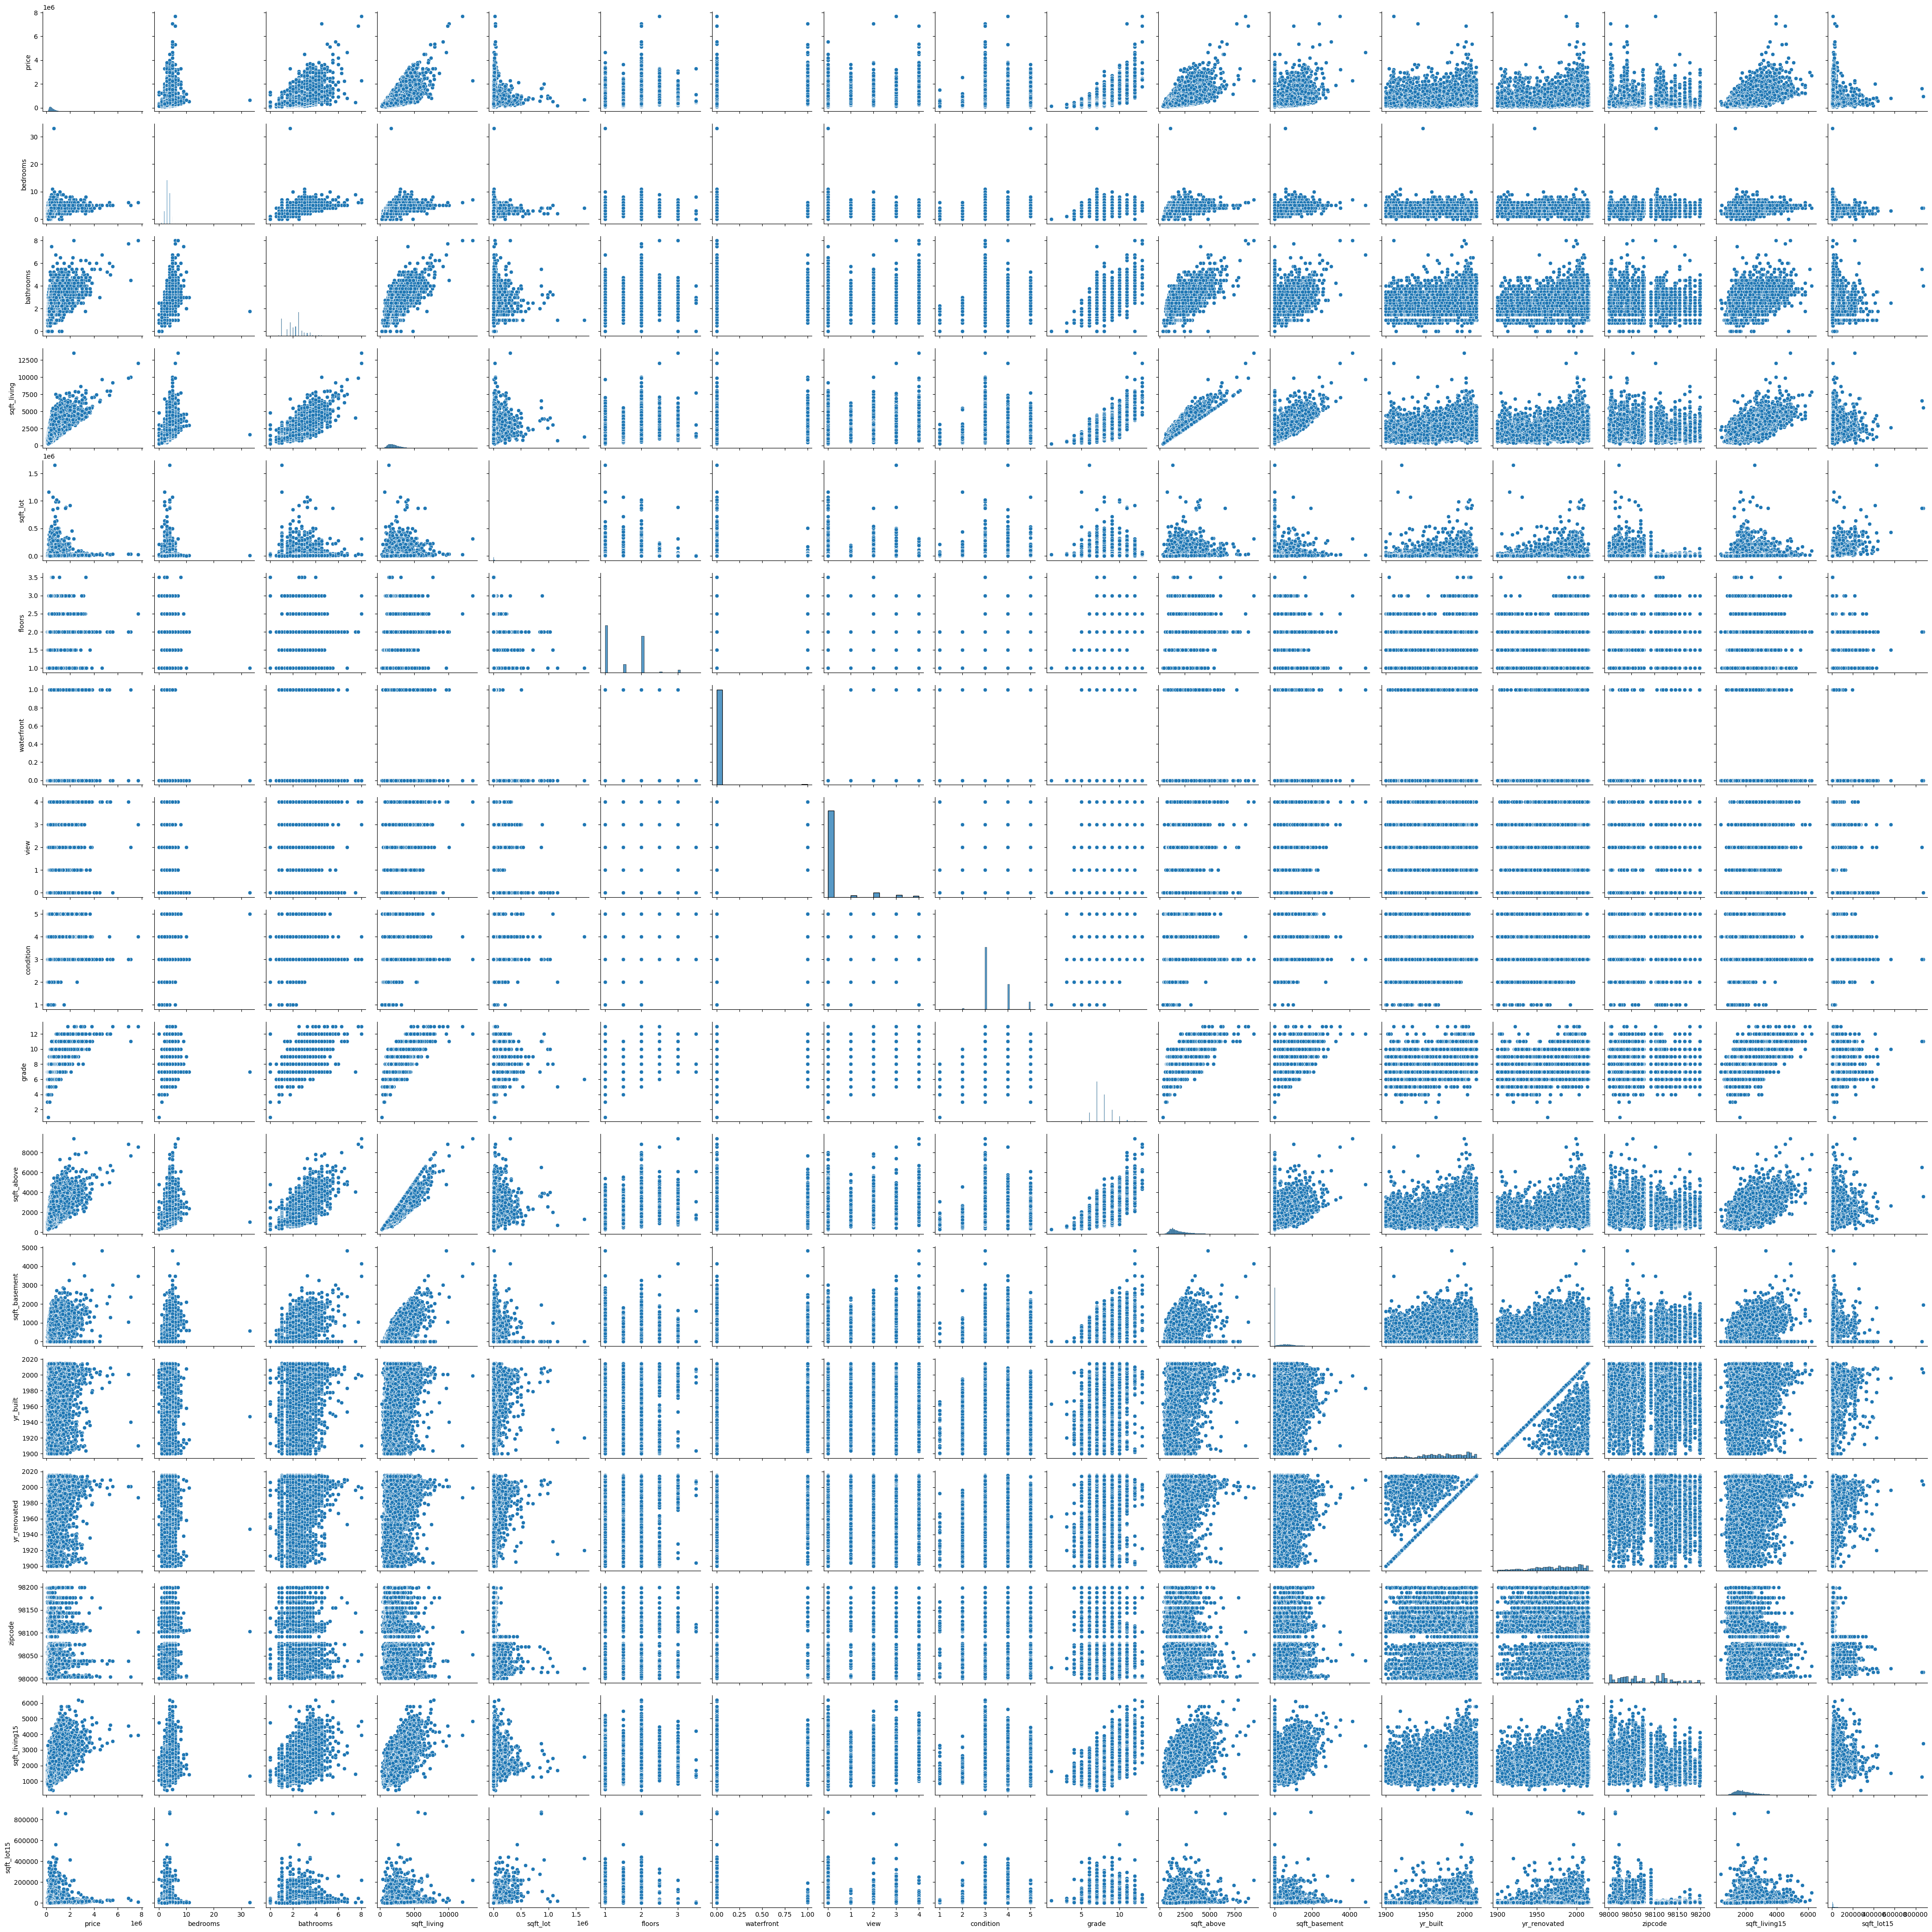

In [54]:
sns.pairplot(df2)

In [55]:
length=int((df2.shape[0]*80)/100)
print(length)

17290


In [56]:
X_train=df2[:length].drop("price",axis=1)
y_train=df2["price"][:length]
X_test=df2[length:].drop("price",axis=1)
y_test=df2["price"][length:]

In [57]:
X_train.shape

(17290, 16)

In [58]:
y_train.shape

(17290,)

In [59]:
X_test.shape

(4323, 16)

In [60]:
y_test.shape

(4323,)

In [61]:
train_data=X_train.join(y_train)
train_data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3    1.00000         1180      5650 1.00000           0     0   
1         3    2.25000         2570      7242 2.00000           0     0   
2         2    1.00000          770     10000 1.00000           0     0   
3         4    3.00000         1960      5000 1.00000           0     0   
4         3    2.00000         1680      8080 1.00000           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955          1955   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933          1933   
3          5      7        1050            910      1965          1965   
4          3      8        1680              0      1987          1987   

   zipcode  sqft_living15  sqft_lot15        price  
0    98178           1340        5650 221900.00000  
1    98125           1690        7639 538000.00000  
2    98028           2720        8062 180000.00000  
3    98136           1360        5000 604000.00000  
4    98074           1800        7503 510000.00000

In [62]:
train_data.shape

(17290, 17)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

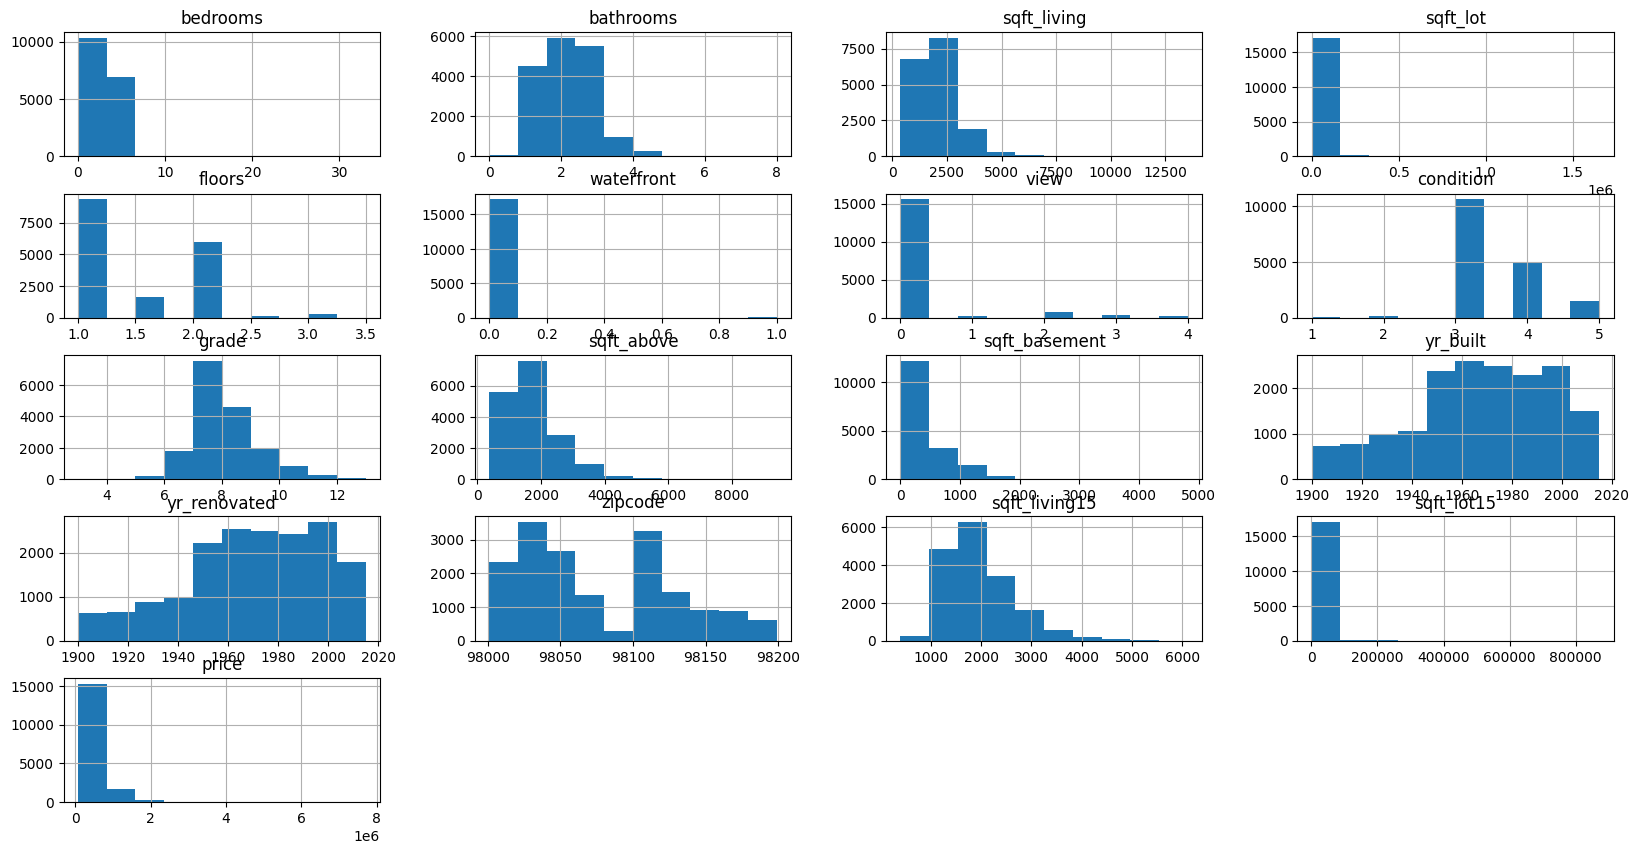

In [63]:
train_data.hist()

In [64]:
train_data.corr()

bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
bedrooms        1.00000    0.51771      0.56239   0.03418  0.20710   
bathrooms       0.51771    1.00000      0.76101   0.09915  0.50447   
sqft_living     0.56239    0.76101      1.00000   0.18086  0.40100   
sqft_lot        0.03418    0.09915      0.18086   1.00000  0.02498   
floors          0.20710    0.50447      0.40100   0.02498  1.00000   
waterfront     -0.00246    0.07474      0.11456   0.02199  0.03547   
view            0.08524    0.20226      0.29502   0.06967  0.05709   
condition       0.03278   -0.09463     -0.04870  -0.01993 -0.22266   
grade           0.35566    0.65954      0.76835   0.13008  0.46451   
sqft_above      0.45500    0.68498      0.86767   0.19743  0.58023   
sqft_basement   0.31477    0.30181      0.45466   0.00966 -0.23385   
yr_built        0.16098    0.48562      0.32425   0.08911  0.41814   
yr_renovated    0.17278    0.51918      0.35328   0.08912  0.44230   
zipcode        -0.13864   -0.20255     -0.18018  -0.12775 -0.07907   
sqft_living15   0.37202    0.58017      0.75399   0.15931  0.32987   
sqft_lot15      0.02965    0.09576      0.18526   0.71881  0.01987   
price           0.30131    0.52319      0.70141   0.09288  0.28135   

               waterfront     view  condition    grade  sqft_above  \
bedrooms         -0.00246  0.08524    0.03278  0.35566     0.45500   
bathrooms         0.07474  0.20226   -0.09463  0.65954     0.68498   
sqft_living       0.11456  0.29502   -0.04870  0.76835     0.86767   
sqft_lot          0.02199  0.06967   -0.01993  0.13008     0.19743   
floors            0.03547  0.05709   -0.22266  0.46451     0.58023   
waterfront        1.00000  0.39908    0.01113  0.09030     0.08229   
view              0.39908  1.00000    0.03931  0.26368     0.17953   
condition         0.01113  0.03931    1.00000 -0.12679    -0.14697   
grade             0.09030  0.26368   -0.12679  1.00000     0.76284   
sqft_above        0.08229  0.17953   -0.14697  0.76284     1.00000   
sqft_basement     0.08273  0.27111    0.16548  0.17705    -0.04828   
yr_built         -0.01495 -0.03844   -0.31678  0.43329     0.42539   
yr_renovated      0.01115  0.00078   -0.35583  0.44848     0.43966   
zipcode           0.03114  0.08904   -0.00229 -0.18675    -0.24356   
sqft_living15     0.09231  0.29256   -0.09135  0.73770     0.72934   
sqft_lot15        0.03131  0.06497   -0.01700  0.13066     0.20355   
price             0.27616  0.40456    0.04571  0.66374     0.60524   

               sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  \
bedrooms             0.31477   0.16098       0.17278 -0.13864        0.37202   
bathrooms            0.30181   0.48562       0.51918 -0.20255        0.58017   
sqft_living          0.45466   0.32425       0.35328 -0.18018        0.75399   
sqft_lot             0.00966   0.08911       0.08912 -0.12775        0.15931   
floors              -0.23385   0.41814       0.44230 -0.07907        0.32987   
waterfront           0.08273  -0.01495       0.01115  0.03114        0.09231   
view                 0.27111  -0.03844       0.00078  0.08904        0.29256   
condition            0.16548  -0.31678      -0.35583 -0.00229       -0.09135   
grade                0.17705   0.43329       0.44848 -0.18675        0.73770   
sqft_above          -0.04828   0.42539       0.43966 -0.24356        0.72934   
sqft_basement        1.00000  -0.11064      -0.07790  0.07434        0.20822   
yr_built            -0.11064   1.00000       0.89566 -0.38458        0.34846   
yr_renovated        -0.07790   0.89566       1.00000 -0.35264        0.34658   
zipcode              0.07434  -0.38458      -0.35264  1.00000       -0.26006   
sqft_living15        0.20822   0.34846       0.34658 -0.26006        1.00000   
sqft_lot15           0.00754   0.10847       0.10720 -0.14705        0.19203   
price                0.32491   0.03736       0.09670 -0.04454        0.60041   

               sqft_lot15    price  
bedrooms       

<Axes: >

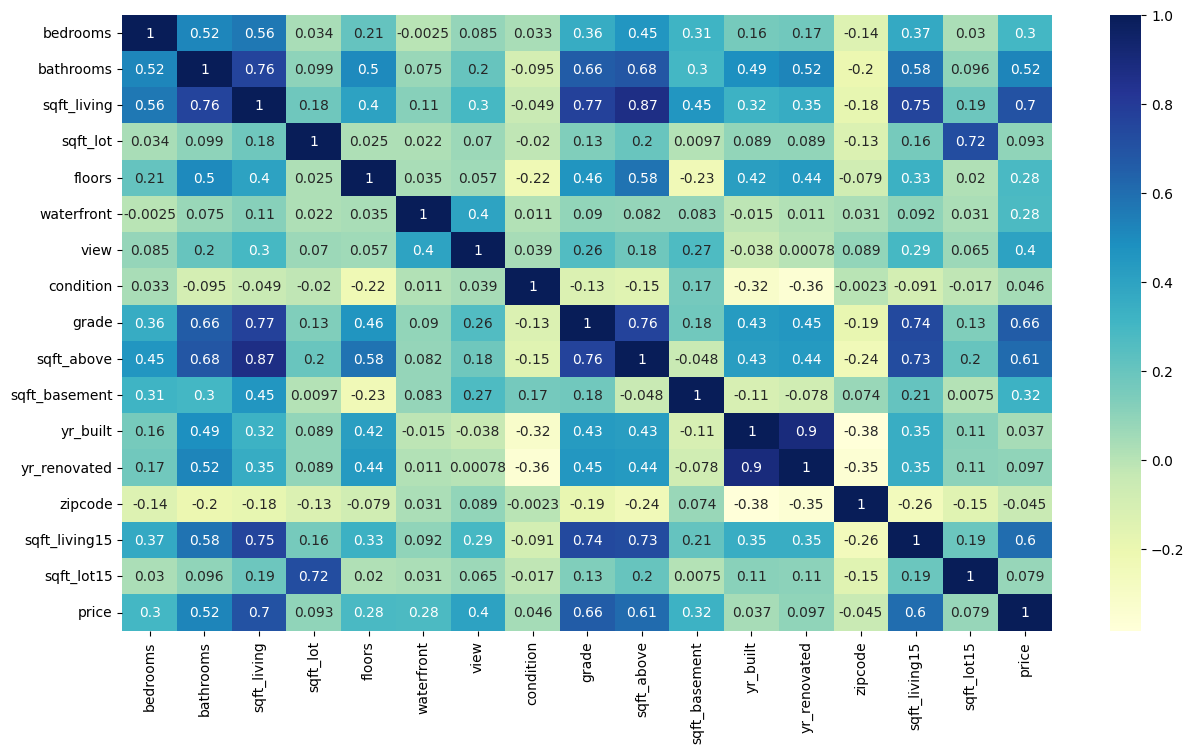

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [66]:
sc=StandardScaler()
sc.fit(X_train)

X_train= sc.transform(X_train)
X_test = sc.transform(X_test)
# y_train= sc.transform(y_train)
# y_test = sc.transform(y_test)

In [67]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
model.score(X_test,y_test)

0.6250453250830648

In [68]:
rfr=RandomForestRegressor()
model=rfr.fit(X_train,y_train)
model.score(X_test,y_test)

0.8051165252659933

In [69]:
gbr=GradientBoostingRegressor()
model=gbr.fit(X_train,y_train)
model.score(X_test,y_test)

0.7864024379457564

In [70]:
dtr=DecisionTreeRegressor()
model=dtr.fit(X_train,y_train)
model.score(X_test,y_test)

0.6396510206184243

In [71]:
y_pred=lr.predict(X_test)
print(y_pred)

[585282.0321026  585282.0321026  341438.15053518 ...  71187.94159828
 366229.4860376   75453.03183967]


In [72]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y_test,y_pred)

149197.77749470057